# Predict the stock market

In [1]:
# Set un the environment
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
from pandas import Series, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns

c:\users\henon\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


## Preprocessing

In [94]:
df_news = pd.read_csv("combined_stock_data.csv")
df_djia = pd.read_csv("DJIA_table.csv")

In [95]:
df_news['Date'] = pd.to_datetime(df_news['Date'])
df_djia['Date'] = pd.to_datetime(df_djia['Date'])

In [96]:
df = df_news[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive','Negative', 'Neutral']].merge(df_djia)

In [97]:
def categorical(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

df['change'] = df['Open'].pct_change()
# remove first row
df['change'] = df['change'].shift(-1)
df['target'] = df['change'].apply(categorical)

In [38]:
df.index = df.index.sort_values()

In [83]:
df.head()

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,change,target
0,2008-08-08,0,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.244438,0
1,2008-12-08,0,56.250000,43.750000,18.750000,37.500000,43.750000,8637.650391,9026.410156,8637.490234,8934.179688,358970000,8934.179688,0.346756,1
2,2008-08-13,0,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.008660,0
3,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.006863,1
4,2008-08-15,1,70.000000,30.000000,10.000000,60.000000,30.000000,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,0.004172,1


## Heatmap of features

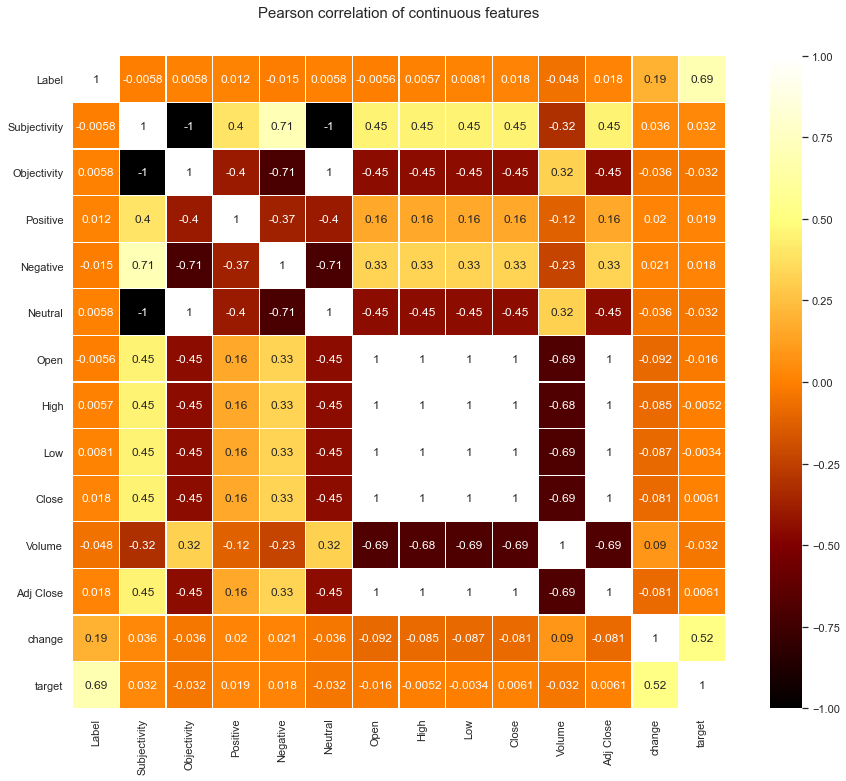

In [84]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

## Preprocessing and cleaning

In [85]:
df = df.dropna()
df.isnull().sum()

Date            0
Label           0
Subjectivity    0
Objectivity     0
Positive        0
Negative        0
Neutral         0
Open            0
High            0
Low             0
Close           0
Volume          0
Adj Close       0
change          0
target          0
dtype: int64

In [86]:
y = df['target']

In [90]:
X = df.drop('Label', axis = 1)
X = X.drop('target', axis = 1)
X = X.drop('Date', axis = 1)
X = X.drop('change', axis = 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

## Modelling

In [93]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_lda.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))

accuracy score:
0.7982456140350878


c:\users\chris\.venvs\lewagon\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\chris\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
c:\users\chris\.venvs\lewagon\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chris\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
